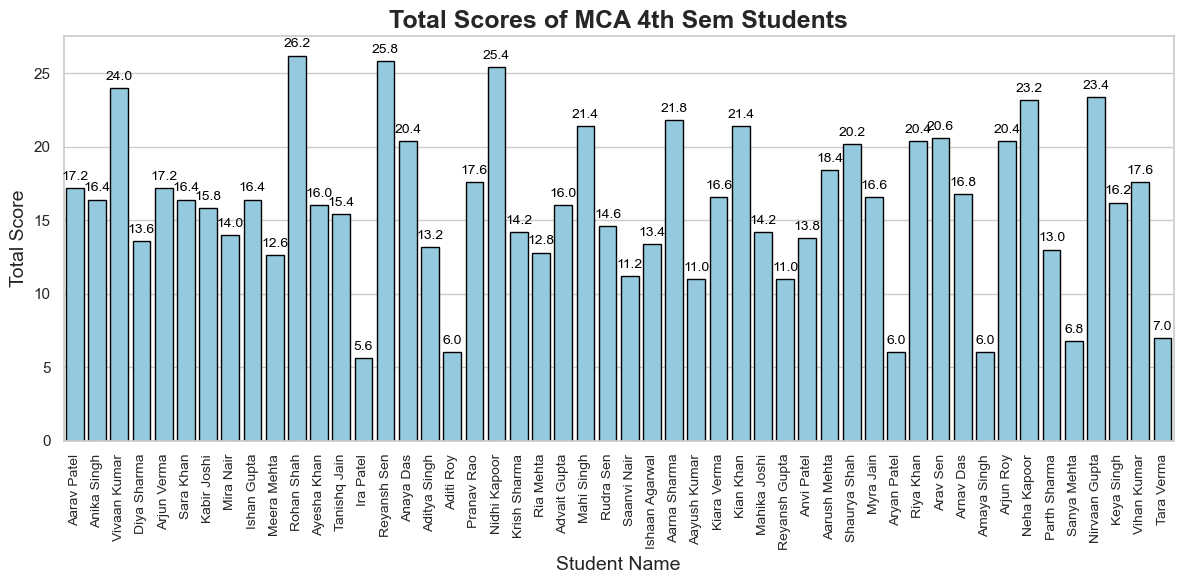

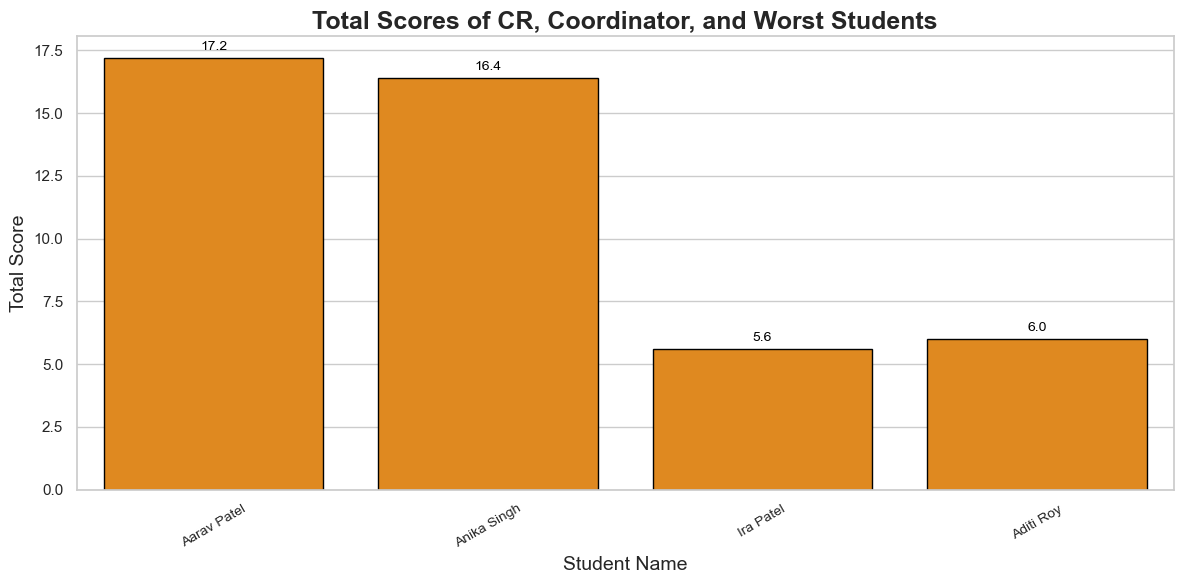


Detailed Data for CR, Coordinator and Worst Students:
           Name  GetUpTime  StudyHours  FitnessHours  Personality  TotalScore  \
0   Aarav Patel          6           5           1.1            8        17.2   
1   Anika Singh          7           6           1.2            7        16.4   
13    Ira Patel          9           4           1.3            6         5.6   
17    Aditi Roy          8           4           1.0            6         6.0   

           Role  
0            CR  
1   Coordinator  
13      Student  
17      Student  

Improvement Timetable for Worst Students:
- GetUpTime: 6
- StudyHours: 6
- FitnessHours: 1.5
- PersonalityPractice: 8


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': [
        "Aarav Patel", "Anika Singh", "Vivaan Kumar", "Diya Sharma", "Arjun Verma",
        "Sara Khan", "Kabir Joshi", "Mira Nair", "Ishan Gupta", "Meera Mehta",
        "Rohan Shah", "Ayesha Khan", "Tanishq Jain", "Ira Patel", "Reyansh Sen",
        "Anaya Das", "Aditya Singh", "Aditi Roy", "Pranav Rao", "Nidhi Kapoor",
        "Krish Sharma", "Ria Mehta", "Advait Gupta", "Mahi Singh", "Rudra Sen",
        "Saanvi Nair", "Ishaan Agarwal", "Aarna Sharma", "Aayush Kumar", "Kiara Verma",
        "Kian Khan", "Mahika Joshi", "Reyansh Gupta", "Anvi Patel", "Aarush Mehta",
        "Shaurya Shah", "Myra Jain", "Aryan Patel", "Riya Khan", "Arav Sen",
        "Arnav Das", "Amaya Singh", "Arjun Roy", "Neha Kapoor", "Parth Sharma",
        "Sanya Mehta", "Nirvaan Gupta", "Keya Singh", "Vihan Kumar", "Tara Verma"
    ],
    'GetUpTime': [6, 7, 8, 7, 6, 7, 8, 9, 7, 8, 6, 7, 8, 9, 7, 6, 7, 8, 9, 7, 6, 8, 7, 8, 9, 6, 7, 8, 9, 7, 8, 9, 6, 7, 8, 9, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 7, 6, 7],
    'StudyHours': [5, 6, 7, 6, 5, 7, 6, 4, 5, 6, 7, 5, 6, 4, 7, 6, 5, 4, 6, 7, 5, 6, 4, 7, 6, 5, 4, 6, 5, 7, 6, 5, 4, 6, 5, 7, 6, 4, 7, 5, 6, 4, 7, 6, 5, 4, 7, 5, 6, 4],
    'FitnessHours': [1.1, 1.2, 1.0, 1.3, 1.1, 1.2, 1.4, 1.0, 1.2, 1.3, 1.1, 1.0, 1.2, 1.3, 1.4, 1.2, 1.1, 1.0, 1.3, 1.2, 1.1, 1.4, 1.0, 1.2, 1.3, 1.1, 1.2, 1.4, 1.0, 1.3, 1.2, 1.1, 1.0, 1.4, 1.2, 1.1, 1.3, 1.0, 1.2, 1.3, 1.4, 1.0, 1.2, 1.1, 1.0, 1.4, 1.2, 1.1, 1.3, 1.0],
    'Personality': [8, 7, 9, 6, 8, 6, 7, 9, 8, 6, 9, 8, 7, 6, 9, 8, 7, 6, 8, 9, 7, 6, 9, 8, 7, 6, 8, 9, 7, 6, 9, 8, 7, 6, 9, 8, 7, 6, 8, 9, 7, 6, 8, 9, 7, 6, 9, 8, 7, 6]
}

# Create DataFrame
df = pd.DataFrame(student_data)

# Normalization process
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = (df['StudyHours'] - df['StudyHours'].min()) / (df['StudyHours'].max() - df['StudyHours'].min()) * 9 + 1  # Scaling to range [1, 10]
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedPersonality'] = (df['Personality'] - df['Personality'].min()) / (df['Personality'].max() - df['Personality'].min()) * 9 + 1  # Scaling to range [1, 10]

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedPersonality']
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Aarav Patel", 'Role'] = 'CR'
df.loc[df['Name'] == "Anika Singh", 'Role'] = 'Coordinator'

# Identify the worst students (bottom 2 based on TotalScore)
worst_students = df.nsmallest(2, 'TotalScore')

# Filter data for CR, Coordinator, and worst students
highlighted_students = pd.concat([df[df['Role'] == 'CR'], df[df['Role'] == 'Coordinator'], worst_students])

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', color='skyblue')
plt.title('Total Scores of MCA 4th Sem Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Plot bar chart for CR, Coordinator, and worst students
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='Name', y='TotalScore', data=highlighted_students, edgecolor='black', color='darkorange')
plt.title('Total Scores of CR, Coordinator, and Worst Students', fontsize=18, weight='bold')
plt.xlabel('Student Name', fontsize=14)
plt.ylabel('Total Score', fontsize=14)
plt.xticks(rotation=30, fontsize=10)

# Annotate the bars
for p in bar.patches:
    bar.annotate(f'{p.get_height():.1f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Show detailed attributes for CR, Coordinator, and worst students
print("\nDetailed Data for CR, Coordinator and Worst Students:")
print(highlighted_students[['Name', 'GetUpTime', 'StudyHours', 'FitnessHours', 'Personality', 'TotalScore', 'Role']])

# Improvement timetable for worst students
improvement_timetable = {
    'GetUpTime': 6,
    'StudyHours': 6,
    'FitnessHours': 1.5,
    'PersonalityPractice': 8,  # Updated here for personality
}

print("\nImprovement Timetable for Worst Students:")
for key, value in improvement_timetable.items():
    print(f"- {key}: {value}")
